<a href="https://colab.research.google.com/github/nitinsharma006/data_science/blob/main/Dropout_in_Neural_Networks_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Dropout

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding dropout layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model using Dropout</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [2]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg

In [5]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [6]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [7]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [8]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [9]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [10]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [11]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [12]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Adding dropout layer(s)</ol>

In [13]:
# importing the dropout layer
from keras.layers import Dropout

In [14]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## 5. Compiling the model

In [15]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [16]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 6. Training the model using Dropout

In [17]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))


Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 3s 2ms/step - loss: 0.7710 - accuracy: 0.5559 - val_loss: 0.6945 - val_accuracy: 0.5609
Epoch 2/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7461 - accuracy: 0.5583 - val_loss: 0.6939 - val_accuracy: 0.5609
Epoch 3/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7360 - accuracy: 0.5510 - val_loss: 0.6932 - val_accuracy: 0.5609
Epoch 4/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7210 - accuracy: 0.5553 - val_loss: 0.6934 - val_accuracy: 0.5609
Epoch 5/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7232 - accuracy: 0.5656 - val_loss: 0.6924 - val_accuracy: 0.5609
Epoch 6/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7493 - accuracy: 0.5480 - val_loss: 0.6919 - val_accuracy: 0.5609
Epoch 7/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.729

## 7. Evaluating model performance 

In [18]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7237960339943342 %


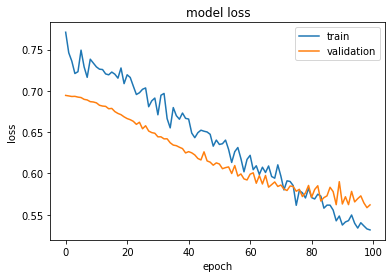

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

![alt text](https://drive.google.com/uc?id=1pEBFo1GkfKsvWtKTKinqYVSxOGy1M4ie)